## ANN exercise of using some offshore sensor data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('trainData_xiaodan.csv')
df.head()

,ID,NODE_MINUTES,NODES,EXECUTIONSTART,SHOTS,RESENTSHOTS,RESTART,SCNAME,NTHREADS,NCPU,...,ATTR33,ATTR34,ATTR35,ATTR36,ATTR37,ATTR38,ATTR39,ATTR30,ATTR31.1,ATTR32.1
0,456903204,765,8,2019-06-03 17:06:42,473,0,F,center_6,1,2,...,2046670.0,17593259786,240,8,1918,0,0,0,0,0
1,456978806,21,4,2019-06-03 17:06:48,4,0,F,center_9,1,2,...,402412.0,1608465252,39,25,961,0,0,0,0,0
2,457103510,439,8,2019-06-03 17:07:22,36,0,F,center_1,1,4,...,131367.0,446121902,87,9,779,0,0,0,0,0
3,454781320,3076,24,2019-06-03 17:07:56,57,0,F,center_3,1,2,...,1994010.0,17635135717,219,8,1751,0,0,0,0,0
4,454781322,3260,24,2019-06-03 17:07:57,56,0,F,center_8,1,4,...,1994010.0,17635135717,219,8,1751,0,0,0,0,0


# Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55092 entries, 0 to 55091
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              55092 non-null  int64  
 1   NODE_MINUTES    55092 non-null  int64  
 2   NODES           55092 non-null  int64  
 3   EXECUTIONSTART  55092 non-null  object 
 4   SHOTS           55092 non-null  int64  
 5   RESENTSHOTS     55092 non-null  int64  
 6   RESTART         55092 non-null  object 
 7   SCNAME          55092 non-null  object 
 8   NTHREADS        55092 non-null  int64  
 9   NCPU            55092 non-null  int64  
 10  ATTR01          55092 non-null  object 
 11  ATTR02          55092 non-null  object 
 12  ATTR03          55092 non-null  object 
 13  ATTR04          55092 non-null  object 
 14  ATTR05          55092 non-null  object 
 15  ATTR06          55092 non-null  float64
 16  ATTR07          55092 non-null  object 
 17  ATTR08          55092 non-null 

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,55092.0,4.588988e+08,1.887491e+06,4.477357e+08,4.580031e+08,4.592672e+08,4.601245e+08,4.611672e+08
NODE_MINUTES,55092.0,9.064669e+02,1.964524e+03,1.100000e+01,6.400000e+01,3.120000e+02,7.590000e+02,3.813700e+04
NODES,55092.0,8.714260e+00,4.678186e+00,2.000000e+00,4.000000e+00,8.000000e+00,8.000000e+00,8.000000e+01
SHOTS,55092.0,1.394992e+02,1.623455e+02,1.000000e+00,1.600000e+01,9.700000e+01,2.190000e+02,5.618000e+03
RESENTSHOTS,55092.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
NTHREADS,55092.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
NCPU,55092.0,3.424163e+00,9.055940e-01,2.000000e+00,2.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
ATTR06,55092.0,6.912864e+00,1.363106e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01,8.000000e+01
ATTR08,55092.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ATTR09,55092.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


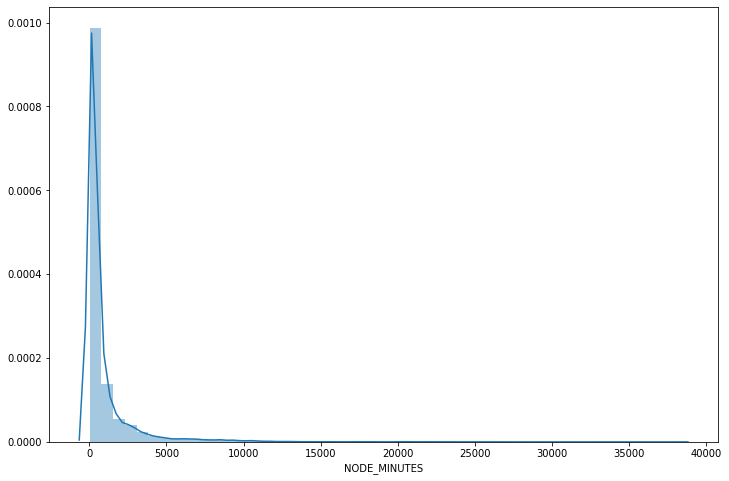

In [5]:
plt.figure(figsize=(12,8))
sns.distplot(df['NODE_MINUTES'])

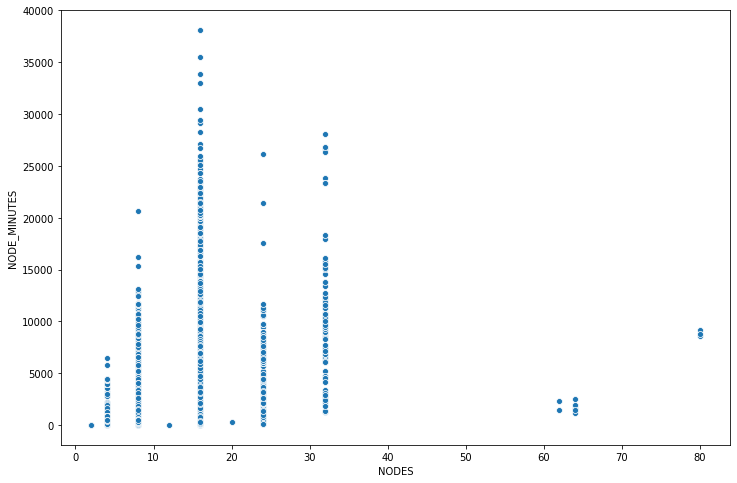

In [6]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="NODES", y="NODE_MINUTES", data=df)

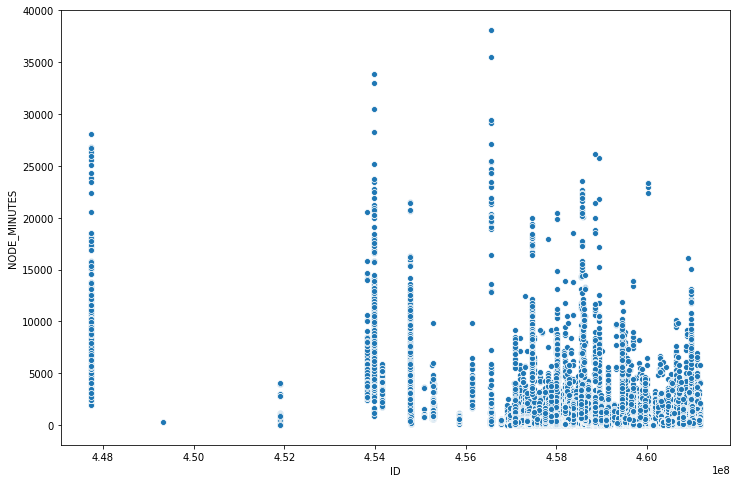

In [7]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='ID',y='NODE_MINUTES',data=df)

# Working with Feature Data

In [8]:
df.columns

Index(['ID', 'NODE_MINUTES', 'NODES', 'EXECUTIONSTART', 'SHOTS', 'RESENTSHOTS',
       'RESTART', 'SCNAME', 'NTHREADS', 'NCPU', 'ATTR01', 'ATTR02', 'ATTR03',
       'ATTR04', 'ATTR05', 'ATTR06', 'ATTR07', 'ATTR08', 'ATTR09', 'ATTR10',
       'ATTR11', 'ATTR12', 'ATTR13', 'ATTR14', 'ATTR15', 'ATTR16', 'ATTR17',
       'ATTR18', 'ATTR19', 'ATTR20', 'ATTR21', 'ATTR22', 'ATTR23', 'ATTR24',
       'ATTR25', 'ATTR26', 'ATTR27', 'ATTR28', 'ATTR29', 'ATTR20.1', 'ATTR31',
       'ATTR32', 'ATTR33', 'ATTR34', 'ATTR35', 'ATTR36', 'ATTR37', 'ATTR38',
       'ATTR39', 'ATTR30', 'ATTR31.1', 'ATTR32.1'],
      dtype='object')

In [9]:
keep_col = ['ID', 'NODE_MINUTES', 'NODES', 'EXECUTIONSTART', 'SHOTS', 'NCPU', 
            'ATTR06', 'ATTR10', 'ATTR17', 'ATTR18', 'ATTR20', 'ATTR21', 
            'ATTR25', 'ATTR33', 'ATTR34', 'ATTR35', 'ATTR36', 'ATTR37', 
            'ATTR38', 'ATTR39', 'ATTR30', 'ATTR31.1', 'ATTR32.1']
newdf = df[keep_col].copy()
newdf.head()

,ID,NODE_MINUTES,NODES,EXECUTIONSTART,SHOTS,NCPU,ATTR06,ATTR10,ATTR17,ATTR18,...,ATTR33,ATTR34,ATTR35,ATTR36,ATTR37,ATTR38,ATTR39,ATTR30,ATTR31.1,ATTR32.1
0,456903204,765,8,2019-06-03 17:06:42,473,2,0.0,2174,192,160,...,2046670.0,17593259786,240,8,1918,0,0,0,0,0
1,456978806,21,4,2019-06-03 17:06:48,4,2,15.0,3002,192,192,...,402412.0,1608465252,39,25,961,0,0,0,0,0
2,457103510,439,8,2019-06-03 17:07:22,36,4,0.0,4340,256,256,...,131367.0,446121902,87,9,779,0,0,0,0,0
3,454781320,3076,24,2019-06-03 17:07:56,57,2,36.0,4116,384,320,...,1994010.0,17635135717,219,8,1751,0,0,0,0,0
4,454781322,3260,24,2019-06-03 17:07:57,56,4,36.0,4116,384,320,...,1994010.0,17635135717,219,8,1751,0,0,0,0,0


# Feature Engineering from Date

In [10]:
newdf['EXECUTIONSTART'] = pd.to_datetime(newdf['EXECUTIONSTART'])
newdf.head()

,ID,NODE_MINUTES,NODES,EXECUTIONSTART,SHOTS,NCPU,ATTR06,ATTR10,ATTR17,ATTR18,...,ATTR33,ATTR34,ATTR35,ATTR36,ATTR37,ATTR38,ATTR39,ATTR30,ATTR31.1,ATTR32.1
0,456903204,765,8,2019-06-03 17:06:42,473,2,0.0,2174,192,160,...,2046670.0,17593259786,240,8,1918,0,0,0,0,0
1,456978806,21,4,2019-06-03 17:06:48,4,2,15.0,3002,192,192,...,402412.0,1608465252,39,25,961,0,0,0,0,0
2,457103510,439,8,2019-06-03 17:07:22,36,4,0.0,4340,256,256,...,131367.0,446121902,87,9,779,0,0,0,0,0
3,454781320,3076,24,2019-06-03 17:07:56,57,2,36.0,4116,384,320,...,1994010.0,17635135717,219,8,1751,0,0,0,0,0
4,454781322,3260,24,2019-06-03 17:07:57,56,4,36.0,4116,384,320,...,1994010.0,17635135717,219,8,1751,0,0,0,0,0


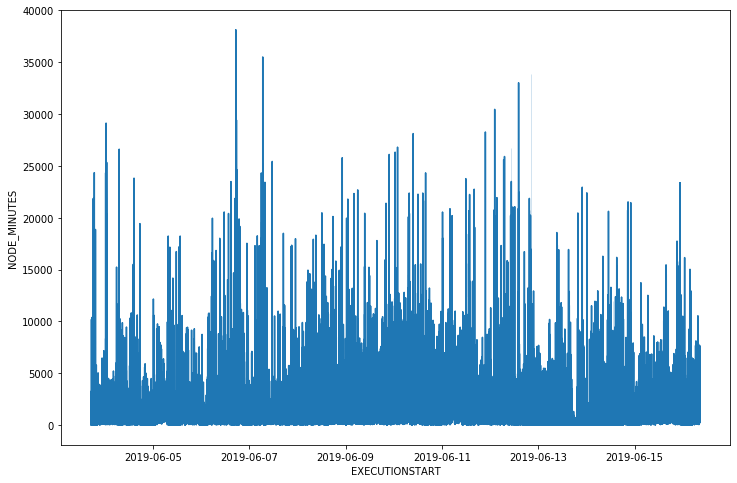

In [11]:
plt.figure(figsize=(12,8))
sns.lineplot(x='EXECUTIONSTART',y='NODE_MINUTES',data=newdf)

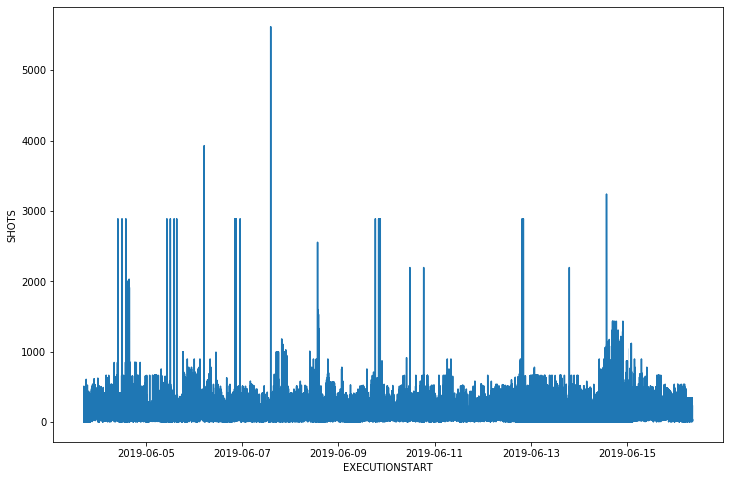

In [15]:
plt.figure(figsize=(12,8))
sns.lineplot(x='EXECUTIONSTART', y='SHOTS', data=newdf)

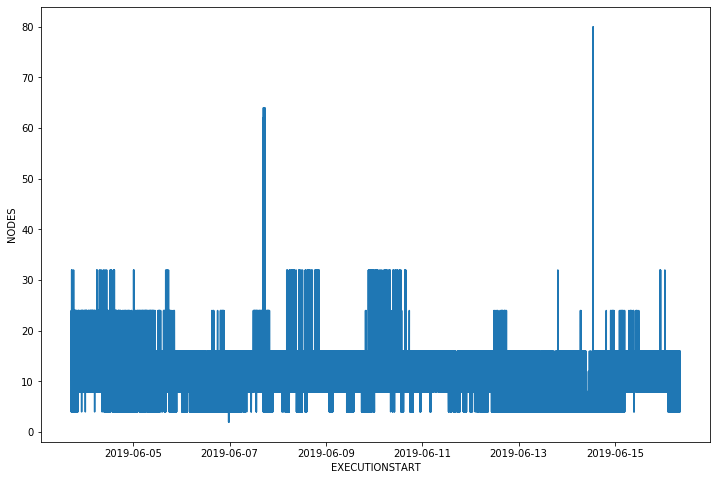

In [17]:
plt.figure(figsize=(12,8))
sns.lineplot(x='EXECUTIONSTART', y='NODES', data=newdf)

In [18]:
newdf = newdf.drop('EXECUTIONSTART',axis=1)

In [19]:
newdf.columns

Index(['ID', 'NODE_MINUTES', 'NODES', 'SHOTS', 'NCPU', 'ATTR06', 'ATTR10',
       'ATTR17', 'ATTR18', 'ATTR20', 'ATTR21', 'ATTR25', 'ATTR33', 'ATTR34',
       'ATTR35', 'ATTR36', 'ATTR37', 'ATTR38', 'ATTR39', 'ATTR30', 'ATTR31.1',
       'ATTR32.1'],
      dtype='object')

# Scaling and Train Test Split

In [20]:
X = newdf.drop('NODE_MINUTES',axis=1)
y = newdf['NODE_MINUTES']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

# Scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
X_train= scaler.fit_transform(X_train)

In [26]:
X_test = scaler.transform(X_test)

In [27]:
X_train.shape, X_test.shape

((44073, 21), (11019, 21))

# Creating a Model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
# from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

In [29]:
# first model
# model = Sequential()

# model.add(Dense(19,activation='relu'))
# model.add(Dense(19,activation='relu'))
# model.add(Dense(19,activation='relu'))
# model.add(Dense(19,activation='relu'))
# model.add(Dense(1))

# model.compile(optimizer='adam',loss='mse')

In [81]:
model = Sequential()

model.add(Dense(114,activation='relu', input_shape=(21,)))
model.add(Dense(76,activation='relu'))
model.add(Dense(38,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

adam = optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer=adam,loss='mae')

# Training the Model

In [82]:
earlystop_callback = EarlyStopping(monitor='val_loss', min_delta=0.05, patience=20, verbose=0)
model.fit(x=X_train,y=y_train.values, callbacks=[earlystop_callback],
          validation_split=0.2, batch_size=128,epochs=250)

Train on 35258 samples, validate on 8815 samples
Epoch 1/250
35258/35258 [==============================] - 2s 71us/sample - loss: 538.1659 - val_loss: 458.9299
Epoch 2/250
35258/35258 [==============================] - 2s 47us/sample - loss: 416.9586 - val_loss: 407.7092
Epoch 3/250
35258/35258 [==============================] - 2s 45us/sample - loss: 371.0148 - val_loss: 368.6092
Epoch 4/250
35258/35258 [==============================] - 1s 40us/sample - loss: 331.8032 - val_loss: 333.4965
Epoch 5/250
35258/35258 [==============================] - 2s 45us/sample - loss: 312.5284 - val_loss: 324.5941
Epoch 6/250
35258/35258 [==============================] - 1s 41us/sample - loss: 299.2507 - val_loss: 317.6770
Epoch 7/250
35258/35258 [==============================] - 2s 54us/sample - loss: 295.7509 - val_loss: 296.9088
Epoch 8/250
35258/35258 [==============================] - 2s 61us/sample - loss: 285.1886 - val_loss: 301.3451
Epoch 9/250
35258/35258 [==============================

35258/35258 [==============================] - 2s 55us/sample - loss: 187.0762 - val_loss: 204.3773
Epoch 146/250
35258/35258 [==============================] - 2s 54us/sample - loss: 185.9414 - val_loss: 203.6911
Epoch 147/250
35258/35258 [==============================] - 2s 51us/sample - loss: 185.2340 - val_loss: 198.3199
Epoch 148/250
35258/35258 [==============================] - 2s 49us/sample - loss: 185.3115 - val_loss: 201.3816
Epoch 149/250
35258/35258 [==============================] - 2s 48us/sample - loss: 185.0631 - val_loss: 196.9502
Epoch 150/250
35258/35258 [==============================] - 2s 54us/sample - loss: 183.6514 - val_loss: 194.0723
Epoch 151/250
35258/35258 [==============================] - 2s 50us/sample - loss: 183.3104 - val_loss: 201.7559
Epoch 152/250
35258/35258 [==============================] - 2s 51us/sample - loss: 184.1040 - val_loss: 193.1386
Epoch 153/250
35258/35258 [==============================] - 2s 53us/sample - loss: 183.5960 - val_los

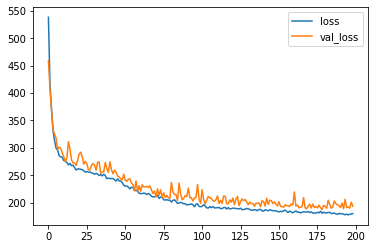

In [84]:
losses = pd.DataFrame(model.history.history)
losses.plot()

# Evaluation on Test Data

In [33]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score

In [85]:
predictions = model.predict(X_test)

In [86]:
mean_absolute_error(y_test,predictions)

178.93382630303634

In [87]:
np.sqrt(mean_squared_error(y_test,predictions))

701.1730621454113

In [88]:
explained_variance_score(y_test,predictions)

0.8757313542677969

In [89]:
r2_score(y_test,predictions)

0.8740899172546988

In [39]:
newdf['NODE_MINUTES'].mean(), newdf['NODE_MINUTES'].median()

(906.4668554418064, 312.0)

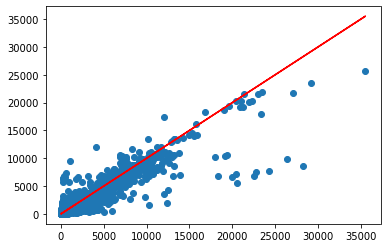

In [90]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [66]:
errors = y_test.values.reshape(11019, 1) - predictions

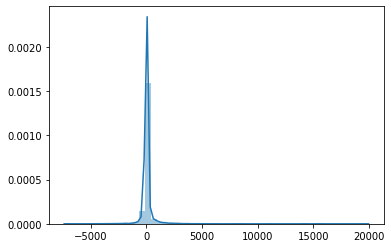

In [67]:
sns.distplot(errors)

# Predicting on blind testing data

In [93]:
df_2 = pd.read_csv('testData_xiaodan.csv')
keep_col = X.columns
df_2 = df_2[keep_col].copy()
df_2.head()

,ID,NODES,SHOTS,NCPU,ATTR06,ATTR10,ATTR17,ATTR18,ATTR20,ATTR21,...,ATTR33,ATTR34,ATTR35,ATTR36,ATTR37,ATTR38,ATTR39,ATTR30,ATTR31.1,ATTR32.1
0,461167196,4,182,2,0.0,2470,192,192,299,23.422,...,962090,7723424940,225,8,1793,0,0,0,0,0
1,461167218,4,289,2,0.0,2470,192,192,299,23.539,...,2630227,21115132968,225,8,1793,0,0,0,0,0
2,461027768,8,237,4,0.0,1508,160,160,215,11.214,...,2233219,10799695265,133,8,1063,0,0,0,0,0
3,459849022,8,343,2,0.0,2512,224,160,212,17.756,...,1534193,16532402864,157,8,1251,0,0,0,0,0
4,459849035,8,343,4,0.0,2512,224,160,212,17.805,...,1737591,18723909926,157,8,1251,0,0,0,0,0


In [94]:
final_df = df_2['ID'].copy()
final_df.head()

0    461167196
1    461167218
2    461027768
3    459849022
4    459849035
Name: ID, dtype: int64

In [95]:
df_2 = scaler.transform(df_2.values.reshape(-1, 21))

In [96]:
pred = model.predict(df_2)

In [97]:
pred.mean(), np.median(pred), pred.std()

(980.3853, 418.47266, 1700.2017)

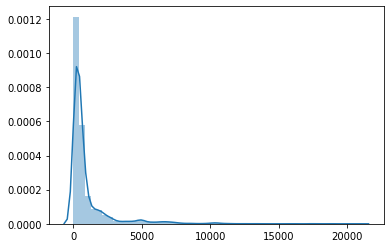

In [98]:
sns.distplot(pred)

In [99]:
final_df = pd.concat([final_df, pd.DataFrame(pred)], axis=1)
final_df.columns =['ID', 'NODE_MINUTES']
final_df.head()

,ID,NODE_MINUTES
0,461167196,561.875305
1,461167218,883.100891
2,461027768,344.307800
3,459849022,637.416931
4,459849035,552.065552


In [100]:
final_df.to_csv('test_pred_Xiaodan.csv')